In [346]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df_origin = pd.read_csv('../backup/HN__11_21_all.csv')

/var/folders/3y/hj83hdwn2nn49jp7jks64t480000gn/T/ipykernel_19306/1067601083.py:6: DtypeWarning: Columns (1,37,38,105,135,140,208,260,285,311,380,386,427,513,526,528,530,567,585,660,662,664,669,673,779,780,784,867,868,869,870,891,897,908,918,974,978,984,991,998,1008,1017,1019,1023,1025,1132,1134,1147,1149,1157,1162,1163,1173,1176,1192,1198,1213,1214,1215,1282,1290,1305,1308,1318,1326,1346,1367,1429,1436) have mixed types. Specify dtype option on import or set low_memory=False.
  df_origin = pd.read_csv('../backup/HN__11_21_all.csv')


In [347]:
# year 가 [2014, 2016, 2018] 속한 것만 추출
df = df_origin[df_origin['year'].isin([2014, 2016, 2018])]

In [348]:
num_features = ["age",
"ainc",
"HE_PLS_15",
"HE_PLS_30",
"HE_mPLS",
"HE_sbp",
"HE_dbp",
"HE_ht",
"HE_wt",
"HE_wc",
"HE_glu",
"HE_HbA1c",
"HE_insulin",
"HE_chol",
"HE_HDL_st2",
"HE_TG",
"HE_LDL_drct",
"HE_ast",
"HE_alt",
"HE_HB",
"HE_HCT",
"HE_BUN",
"HE_crea",
"HE_WBC",
"HE_RBC",
"HE_Bplt",
"HE_Uacid",
"HE_Uph",
"HE_Usg",
"HE_Ucrea"]

onehot_features = ["region",
"sex",
"occp",
"marri_1",
"tins",
"npins",
"D_2_1",
"DI1_pr",
"DI1_pt",
"DI2_pr",
"DI2_pt",
"DI3_pr",
"DI3_pt",
"DJ4_pr",
"DJ4_pt",
"DE1_pr",
"DE1_pt",
"BH9_11",
"BH1",
"BH2_61",
"LQ4_00",
"LQ1_sb",
"LQ2_ab",
"AC1_yr",
"MH1_yr",
"EC_occp",
"EC_stt_1",
"EC_stt_2",
"EC_wht_0",
"BO1_1",
"BO2_1",
"BD1",
"BS8_2",
"BS9_2",
"LW_ms",
"LW_pr",
"LW_oc",
"HE_rPLS",
"HE_Unitr",
"HE_Upro",
"HE_Uglu",
"HE_Uket",
"HE_Ubil",
"HE_Ubld",
"HE_Uro",
"BM1_0",
"BM1_1",
"BM1_2",
"BM1_3",
"BM1_4",
"BM1_5",
"BM1_6",
"BM1_7",
"BM1_8",
"L_BR_TO",
"L_LN_TO",
"L_DN_TO",
"LK_LB_US",
"LK_LB_EF",
"live_t",
"educ",
"BO1",
"HE_obe",]

label_features = ["incm",
"ho_incm",
"incm5",
"ho_incm5",
"edu",
"cfam",
"house",
"D_1_1",
"DI3_2",
"BD1_11",
"BD2_1",
"BA2_12",
"BA2_13",
"BP1",
"BS3_1",
"BE3_31",
"BE5_1",
"OR1",
]

y_related =["BP_PHQ_1",
"BP_PHQ_2",
"BP_PHQ_3",
"BP_PHQ_4",
"BP_PHQ_5",
"BP_PHQ_6",
"BP_PHQ_7",
"BP_PHQ_8",
"BP_PHQ_9",
"mh_PHQ_S",
"BP6_10",
"BP6_31",
"DF2_pr",
"DF2_pt",]

In [349]:
#한글 컬럼명 매핑
numerical_stuff = ['HE_RBC', 'HE_glu', 'HE_wt', 'HE_TG', 'HE_ast', 'HE_crea', 'ainc', 'HE_ht', 'HE_chol', 'HE_Uph', 'HE_Bplt', 'HE_wc', 'HE_dbp', 'HE_Usg', 'HE_HDL_st2', 'HE_WBC', 'HE_HCT', 'HE_HB', 'age', 'HE_alt', 'HE_sbp', 'HE_BUN']
numerical_kr = ['적혈구수', '공복혈당', '체중', '중성지방', '간기능(AST)', '신장기능(혈중크레아티닌)', '월평균가구총소득', '신장(키)', '총콜레스트롤', '소변검사(요산도)', '혈소판', '허리둘레', '혈압측정(최종이완기)', '소변검사(요비증)', '이상지혈증(고밀도지단백콜레스트롤)', '백혈구수', '빈혈(헤마토크리트)', '빈혈(헤모글로빈)', '나이', '간기능(ALT)', '혈압측정(최종수축기)', '신장(혈중요소질소)']
onehot_stuff = ['DI2_pt', 'HE_Uglu', 'BS8_2', 'sex', 'BO1_1', 'HE_Unitr', 'occp', 'DI1_pr', 'HE_Upro', 'BM1_1', 'DI3_pr', 'HE_Ubld', 'BO2_1', 'BO1', 'DI1_pt', 'BM1_3', 'BM1_6', 'HE_obe', 'tins', 'BM1_4', 'marri_1', 'BH9_11', 'HE_Uket', 'DE1_pr', 'BH2_61', 'BH1', 'D_2_1', 'DE1_pt', 'HE_rPLS', 'HE_Ubil', 'live_t', 'BM1_5', 'BM1_8', 'DI2_pr', 'HE_Uro', 'BD1', 'DI3_pt', 'BM1_2', 'BS9_2', 'BM1_7', 'DJ4_pt', 'LQ4_00', 'npins', 'educ', 'EC_occp', 'EC_stt_2', 'LQ1_sb', 'EC_stt_1', 'DJ4_pr', 'LQ2_ab']
onehot_kr = ['이상지질혈증(현재치료여부)', '소변검사(요당)', '직장내간접흡연노출여부', '성별', '일년간체중변화여부', '소변검사(아질산염)', '직업재분류및경제활동상태코드', '고혈압현재유병여부', '소변검사(요단백)', '칫솔질시기(아침식사전)', '뇌졸증현재유병여부', '소변검사(요잡혈)', '일년간체중조절여부', '주관적체형인식', '고혈압치료', '칫솔질시기(점심식사전)', '칫솔질시기(저녁식사후)', '비만유병여부', '건강보험종류', '칫솔질시기(점심식사후)', '결혼여부', '인풀루엔자(독감)예방접종여부', '소변검사(요케톤)', '당뇨병현재유병여부', '2년간암검진여부', '건강검진수진여부', '최근2주간몸이불편했던경험유무', '당뇨병치료', '맥박규칙성여부', '소변검사(요빌리루빈)', '주택형태', '칫솔질시기(저녁식사전)', '칫솔질시기(잠자기전)', '이상지질혈증현재유병여부', '소변검사(유로빌리노겐)', '평생음주경험', '뇌졸증치료', '칫솔질시기(아침식사후)', '가정실내간접흡연노출여부', '칫솔질시기(간식후)', '천식치료', '활동제한여부', '민간의료보험가입여부', '교육수준(학력)', '(취업자)표준직업분류대분류코드', '(취업자)종사상지위:임금근로자상세', '최근1달간와병여부', '(취업자)종사상지위', '천식현재유병여부', '최근한달간결근여부']
label_stuff = ['cfam', 'BE5_1', 'house', 'BA2_13', 'BS3_1', 'D_1_1', 'incm', 'ho_incm', 'incm5', 'BE3_31', 'BA2_12', 'edu', 'BD2_1', 'DI3_2', 'ho_incm5', 'BD1_11']
label_kr = ['가구원수', '1주일간근력운동일수', '주택소유여부', '자동차앞좌석안전벨트착용여부', '현재일반담배흡연여부', '주관적건강인지', '소득4분위수(개인)', '소득4분위수(가구)', '소득5분위수(개인)', '1주일간걷기일수', '운전시안전벨트착용여부', '교육수준재분류코드', '한번에마시는음주량', '뇌졸증후유증', '소득5분위수(가구)', '1년간음주빈도']

print(len(numerical_stuff)  == len(numerical_kr))
print(len(onehot_stuff)  == len(onehot_kr))
print(len(label_stuff)  == len(label_kr))

numerical_kr = dict(zip(numerical_stuff, numerical_kr))
onehot_kr = dict(zip(onehot_stuff, onehot_kr))
label_kr = dict(zip(label_stuff, label_kr))

kr_dict = {**numerical_kr, **onehot_kr, **label_kr}

True
True
True


In [350]:
def manual_preprocess(df:pd.DataFrame, num_features, onehot_features, label_features, y_related):
    # 1) 9, 99, 999 인 녀석들(모름/무응답) null 처리
    df = df.replace([9, 99, 999, 9999], np.nan, inplace=False)

    # 2) mh_PHQ_S 는 null값인데, 각 문항 응답인 BP_PHQ_1 ~ 9의 값이 있는 경우, 더해서 mh_PHQ_S에 넣어주기
    cond = df["BP_PHQ_1"].notna() & \
            df["BP_PHQ_2"].notna() & \
            df["BP_PHQ_3"].notna() & \
            df["BP_PHQ_4"].notna() & \
            df["BP_PHQ_5"].notna() & \
            df["BP_PHQ_6"].notna() & \
            df["BP_PHQ_7"].notna() & \
            df["BP_PHQ_8"].notna() & \
            df["BP_PHQ_9"].notna()
    
    a = df[df["mh_PHQ_S"].isnull() & cond][["BP_PHQ_1", "BP_PHQ_2", "BP_PHQ_3", "BP_PHQ_4", "BP_PHQ_5", "BP_PHQ_6", "BP_PHQ_7", "BP_PHQ_8", "BP_PHQ_9"]]
    b = a[a <= 3].sum(axis=1)
    b[b >= 1] #125

    df['mh_PHQ_S'] = b[b >=1]

    # 3) 결측값 처리 1 - row 기준
    threshold = 0.7 # threshold for null proportion
    null_percent = df.isnull().mean(axis = 1) # 각 행에 대한 결측값 비율 계산
    df = df[null_percent < threshold]
    
    # 4) 변수 생성 `depressed` 
    cond1 = df['mh_PHQ_S'] >= 10 # mh_PHQ_S - total score 
    cond2 = df['BP_PHQ_9'].isin([1, 2, 3]) # person who chose 1, 2, 3 in 9th question 
    cond3 = df['BP6_10'] == 1 
    cond4 = df['BP6_31'] == 1
    cond5 = (df['DF2_pr'] == 1) & (df['mh_PHQ_S'].isna())

    df[cond1 | cond2 | cond3 | cond4 | cond5].drop_duplicates()
 
    df.loc[cond1 | cond2 | cond3 | cond4 | cond5, 'depressed'] = 1 # 조건 중 하나 이상을 만족하는 행에 'depressed' 변수에 1 값 
    df.loc[~(cond1 | cond2 | cond3 | cond4 | cond5), 'depressed'] = 0 # 조건 중 하나라도 만족하지 않는 행에 0 값

    # 5) 학습에 방해가 될 수 있는 그룹 제거 (우울증에 관한 정보가 없는 경우)
    df.drop(df[df['DF2_pr'].isna() & df['mh_PHQ_S'].isna()].index, inplace=True)
    df = df[(df['DF2_pr'] != 8 |  ~df['mh_PHQ_S'].isna())]

    # 6) 결측값 처리 2 - columns 기준
    threshold = 0.1 # 10% 기준 # TODO 30%로 바꿔보기 
    null_percent = df.isnull().mean() # 각 열에 대한 결측값 비율 계산
    selected_cols = null_percent[null_percent < threshold].index
    df = df[selected_cols]

    # 7) y_related 변수를 피쳐에서 제외하기
    remained_y = set(df.columns).intersection(set(y_related))
    y = df['depressed'] # y 생성
    X = df.drop(columns=list(remained_y), inplace=False) # X 생성

    # 8) 위의 결측값 처리에서 빠진 column을 각 피쳐 그룹에서 제외하기
    num_features = set(df.columns).intersection(set(num_features))
    onehot_features = set(df.columns).intersection(set(onehot_features))
    label_features = set(df.columns).intersection(set(label_features))

    # 9) label features중 비해당(8) 값을 각각 알맞은 값으로 대체하기
    label_ans_8 = ["DI3_2", "BD1_11", "BD2_11", "BA2_12", "BA2_13", "BP1", "BS3_1","BE3_31", "BE5_1"] # BD2_11 - removed

    # 'DI3_2' 변수의 값이 8인 경우, 해당 값을 0으로 바꾸기
    X['DI3_2'] = X['DI3_2'].apply(lambda x: 3 if x == 8 else x)
    X['BD1_11'] = X['BD1_11'].apply(lambda x: 1 if x == 8 else x)
    # X['BD2_11'] = X['BD2_11'].apply(lambda x: 0 if x == 8 else x)
    X['BA2_12'] = X['BA2_12'].apply(lambda x: 5 if x == 8 else x)
    X['BA2_13'] = X['BA2_13'].apply(lambda x: 5 if x == 8 else x)
    X['BA2_13'] = X['BA2_13'].apply(lambda x: 5 if x == 8 else x)
    # X['BP1'] = X['BP1'].apply(lambda x: 5 if x == 8 else x)
    X['BS3_1'] = X['BS3_1'].apply(lambda x: 0 if x == 8 else x)
    # X['BE3_31'] = X['BE3_31'].apply(lambda x: 5 if x == 88 else x)
    # X['BE5_1'] = X['BE5_1'].apply(lambda x: 5 if x == 88 else x)

    print("X.shape:", X.shape)
    print("y.shape:", y.shape)

    return X, y, list(num_features), list(onehot_features), list(label_features), list(y_related)

In [351]:
trn_X, trn_y, num_features, onehot_features, label_features, y_related = manual_preprocess(df, num_features, onehot_features, label_features, y_related)

X.shape: (20828, 364)
y.shape: (20828,)


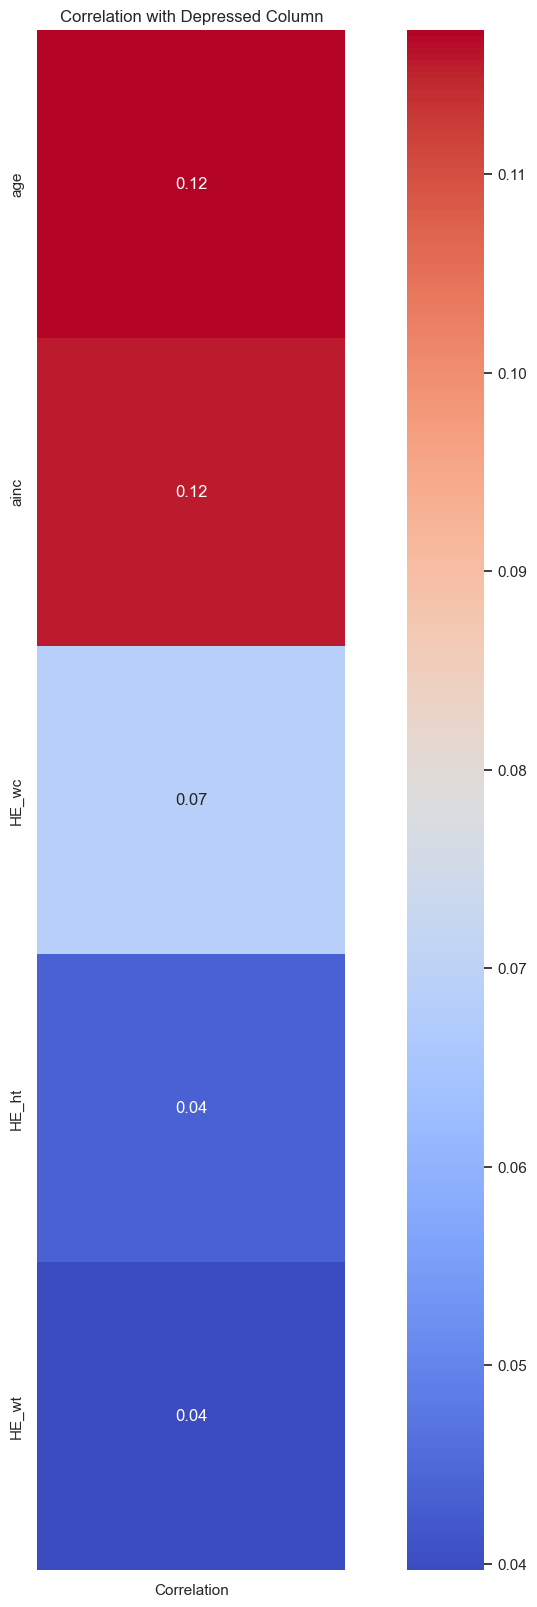

상관 많은거 영어: ['age', 'ainc', 'HE_wc', 'HE_ht', 'HE_wt']
상관 많은거 한글: ['나이', '월평균가구총소득', '허리둘레', '신장(키)', '체중']


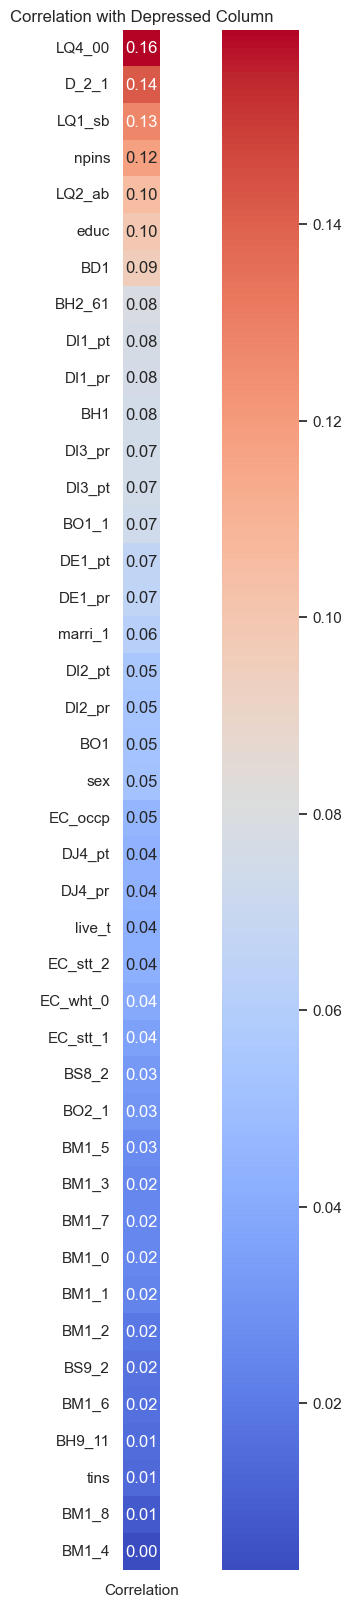

상관 많은거 영어: ['LQ4_00', 'D_2_1', 'LQ1_sb', 'npins', 'LQ2_ab', 'educ', 'BD1', 'BH2_61', 'DI1_pt', 'DI1_pr', 'BH1', 'DI3_pr', 'DI3_pt', 'BO1_1', 'DE1_pt', 'DE1_pr', 'marri_1', 'DI2_pt', 'DI2_pr', 'BO1', 'sex', 'EC_occp', 'DJ4_pt', 'DJ4_pr', 'live_t', 'EC_stt_2', 'EC_wht_0']
상관 많은거 한글: ['활동제한여부', '최근2주간몸이불편했던경험유무', '최근1달간와병여부', '민간의료보험가입여부', '최근한달간결근여부', '교육수준(학력)', '평생음주경험', '2년간암검진여부', '고혈압치료', '고혈압현재유병여부', '건강검진수진여부', '뇌졸증현재유병여부', '뇌졸증치료', '일년간체중변화여부', '당뇨병치료', '당뇨병현재유병여부', '결혼여부', '이상지질혈증(현재치료여부)', '이상지질혈증현재유병여부', '주관적체형인식', '성별', '(취업자)표준직업분류대분류코드', '천식치료', '천식현재유병여부', '주택형태', '(취업자)종사상지위:임금근로자상세', 'EC_wht_0']


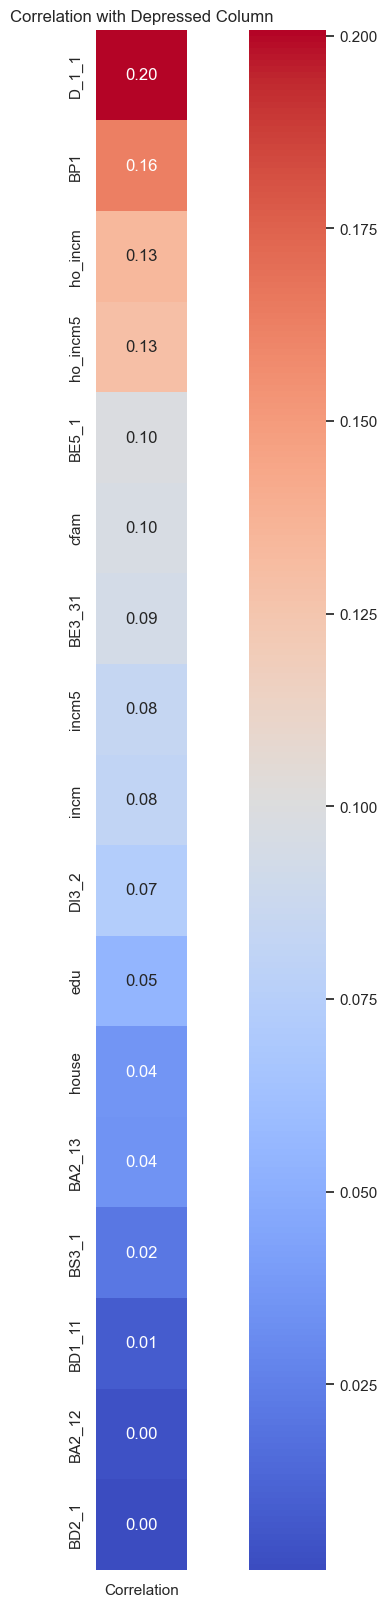

상관 많은거 영어: ['D_1_1', 'BP1', 'ho_incm', 'ho_incm5', 'BE5_1', 'cfam', 'BE3_31', 'incm5', 'incm', 'DI3_2', 'edu']
상관 많은거 한글: ['주관적건강인지', 'BP1', '소득4분위수(가구)', '소득5분위수(가구)', '1주일간근력운동일수', '가구원수', '1주일간걷기일수', '소득5분위수(개인)', '소득4분위수(개인)', '뇌졸증후유증', '교육수준재분류코드']


In [354]:
sns.set(font_scale=1.0)

# 상관 계수 행렬 계산
for features_category in [num_features, onehot_features, label_features]:
    # mh_PHQ_S 컬럼이 있다면 제외
    if "mh_PHQ_S" in features_category:
        features_category.remove("mh_PHQ_S")
        
    correlation_with_depressed = trn_X[features_category].corrwith(trn_X['depressed'])
    correlation_df = pd.DataFrame(correlation_with_depressed.abs().sort_values(ascending=False), columns=["Correlation"])

    plt.figure(figsize=(16, 20))
    sns.heatmap(correlation_df, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
    plt.title('Correlation with Depressed Column')
    plt.show()

    # Correlation 값이 >=0.04 로우들의 인덱스 추출
    upper_score_df = correlation_df[correlation_df['Correlation'] > 0.039]
    
    
    # lower_30_percent_df.index.to_list() 값들을 kr_dict 키 값으로 찾기. 만약 없으면 그냥 그대로 출력
    upper_score_percent_kr = list(map(lambda x: kr_dict[x] if x in kr_dict else x, upper_score_df.index.to_list()))

    print(f"상관 많은거 영어: {upper_score_df.index.to_list()}")
    print(f"상관 많은거 한글: {upper_score_percent_kr}")


In [355]:
# 위에서 상관관계 수치 좀 있는 것들로 추려서 데이터셋 생성.  >= 0.04
num_features2 = ['age', 'ainc', 'HE_wc', 'HE_ht', 'HE_wt']
num_features2 = list(set(num_features).intersection(set(num_features2)))

onehot_features2 = ['LQ4_00', 'D_2_1', 'LQ1_sb', 'npins', 'LQ2_ab', 'educ', 'BD1', 'BH2_61', 'DI1_pt', 'DI1_pr', 'BH1', 'DI3_pr', 'DI3_pt', 'BO1_1', 'DE1_pt', 'DE1_pr', 'marri_1', 'DI2_pt', 'DI2_pr', 'BO1', 'sex', 'EC_occp', 'DJ4_pt', 'DJ4_pr', 'live_t', 'EC_stt_2', 'EC_wht_0']
onehot_features2 = list(set(onehot_features).intersection(set(onehot_features2)))

label_features2 = ['D_1_1', 'BP1', 'ho_incm', 'ho_incm5', 'BE5_1', 'cfam', 'BE3_31', 'incm5', 'incm', 'DI3_2', 'edu']
label_features2 = list(set(label_features).intersection(set(label_features2)))

# config 에 설정해줘야함
print(f"{num_features2}")
print(f"{onehot_features2}")
print(f"{label_features2}")


['age', 'HE_wc', 'ainc', 'HE_ht', 'HE_wt']
['LQ1_sb', 'BO1', 'DI1_pt', 'DE1_pr', 'DI2_pr', 'BH2_61', 'DI3_pr', 'BO1_1', 'marri_1', 'DI2_pt', 'BD1', 'EC_stt_2', 'DI3_pt', 'live_t', 'npins', 'EC_wht_0', 'LQ2_ab', 'BH1', 'D_2_1', 'DJ4_pr', 'DJ4_pt', 'DI1_pr', 'LQ4_00', 'DE1_pt', 'educ', 'EC_occp', 'sex']
['BE5_1', 'BE3_31', 'D_1_1', 'cfam', 'ho_incm', 'BP1', 'incm5', 'edu', 'incm', 'DI3_2', 'ho_incm5']


In [356]:
trn_X.shape

(20828, 364)

In [357]:
trn_X[num_features2+onehot_features2+label_features2].to_csv("../data/train_X_eda01.csv", index=False)
trn_y.to_csv("../data/train_y_eda01.csv", index=False)